<a href="https://colab.research.google.com/github/jimsjoo/finance/blob/master/ALGO_Boll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib as mpl 

plt.style.use('fivethirtyeight')

ticker = 'TSLA'
df = web.DataReader(ticker, data_source='yahoo',start='2016-01-01', end='2019-10-01')

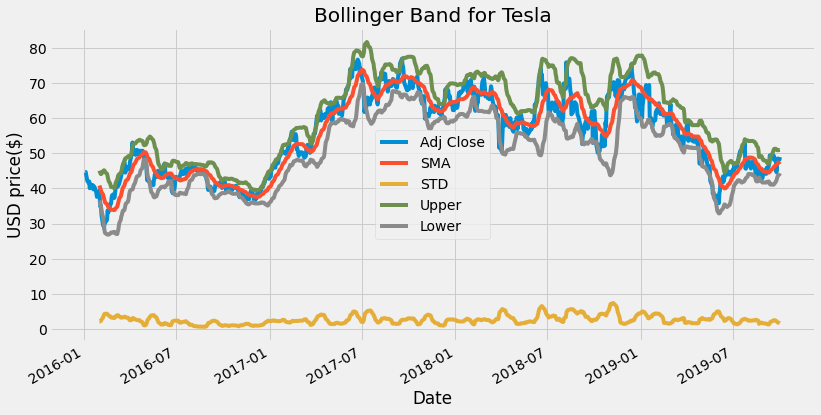

In [ ]:
period = 20
df['SMA'] = df['Adj Close'].rolling(window=period).mean()
df['STD'] = df['Adj Close'].rolling(window=period).std()
df['Upper'] = df['SMA'] + (df['STD']*2)
df['Lower'] = df['SMA'] - (df['STD']*2)
column_list = ['Adj Close', 'SMA', 'STD', 'Upper', 'Lower']

df[column_list].plot( figsize=(12.2, 6.4) )
plt.title('Bollinger Band for Tesla')
plt.ylabel('USD price($)')
plt.show()

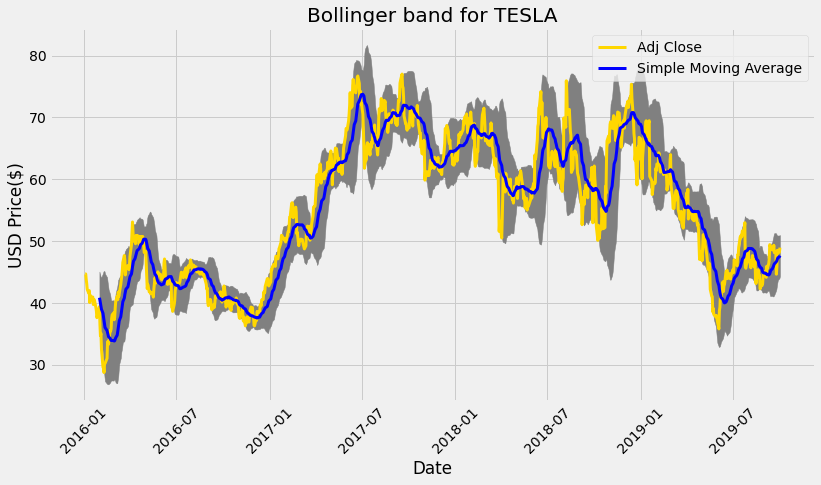

In [ ]:
fig = plt.figure( figsize=(12.2, 6.4))
ax = fig.add_subplot(1, 1, 1)
x_axis = df.index
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
ax.plot(x_axis, df['Adj Close'], color='gold', lw=3, label='Adj Close')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='Simple Moving Average')

ax.set_title('Bollinger band for TESLA')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [ ]:
new_df = df[period-1:]

In [ ]:
def get_signal(data):
  buy_signal=[]
  sell_signal=[]
  for i in range(len(data['Adj Close'])):
    if data['Adj Close'][i]>data['Upper'][i]:
      buy_signal.append(np.nan)
      sell_signal.append(data['Adj Close'][i])
    elif data['Adj Close'][i]<data['Lower'][i]:     
      sell_signal.append(np.nan)
      buy_signal.append(data['Adj Close'][i])
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)  
  return (buy_signal,sell_signal)      

In [ ]:
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

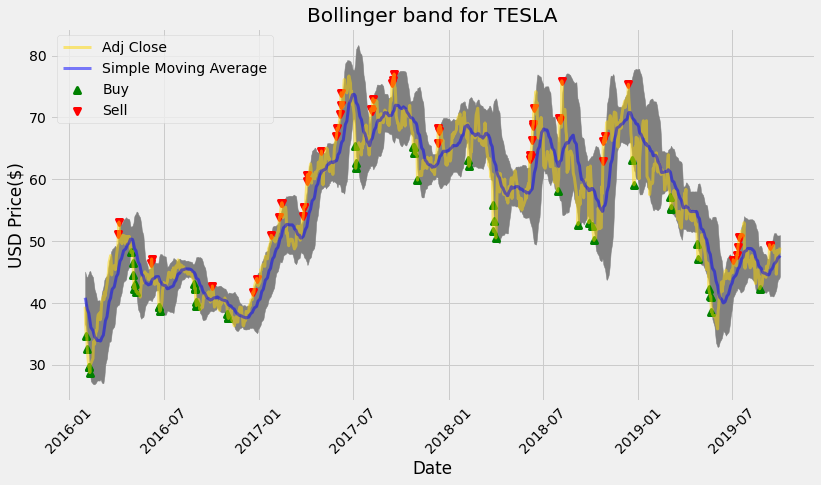

In [ ]:
fig = plt.figure( figsize=(12.2, 6.4))
ax = fig.add_subplot(1, 1, 1)
x_axis = new_df.index
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
ax.plot(x_axis, new_df['Adj Close'], color='gold', lw=3, label='Adj Close', alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label='Simple Moving Average', alpha=0.5)
ax.scatter(x_axis, new_df['Buy'], color='green', lw=3, label='Buy', marker='^', alpha=1)
ax.scatter(x_axis, new_df['Sell'], color='red', lw=3, label='Sell', marker='v', alpha=1)
ax.set_title('Bollinger band for TESLA')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price($)')
plt.xticks(rotation=45)
ax.legend()
plt.show()